# Práctica 6

## Ejercicio 1

In [413]:
alfajores = read.table('./datasets/p6/alfajores.txt', header=TRUE)
nalfajores = nrow(alfajores)

### Pregunta A

La probabilidad de que una caja provenga de la sede Quilmes.

In [414]:
sum(alfajores$fabrica == 0) / nalfajores

[1] 0.256

### Pregunta B

La probabilidad de que una caja sea producida por la sede Quilmes y tenga 3 alfajores defectuosos.

In [415]:
sum(alfajores$defectuosos == 3 & alfajores$fabrica == 0) / nalfajores

[1] 0.018

### Pregunta C

La función de probabilidad puntual conjunta del vector $(X, Y)$.

In [416]:
pxy = t(table(alfajores)) / nalfajores
pxy

       defectuosos
fabrica     0     1     2     3     4
      0 0.096 0.090 0.052 0.018 0.000
      1 0.004 0.034 0.166 0.288 0.252

### Pregunta D

La esperanza y la varianza de $X$.

In [417]:
mean(alfajores$defectuosos)

[1] 2.486

In [418]:
var(alfajores$defectuosos)

[1] 1.605014

### Pregunta E

La probabilidad de que una caja producida por la sede Quilmes tenga 3 alfajores defectuosos.

$P(X=3|Y=0) = \frac{P(X=3, Y=0)}{P(Y=0)}$

In [419]:
pxy[1,4] / sum(pxy[1,])

[1] 0.0703125

### Pregunta F

La probabilidad de que una caja producida por la empresa y elegida al azar tenga 3 alfajores defectuosos.

$P(X = 3)$

In [420]:
sum(pxy[,4])

[1] 0.306

### Pregunta G

La probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Quilmes.

$P(Y=0|X=3) = \frac{P(X=3, Y=0)}{P(X=3)}$

In [421]:
pxy[1,4] / sum(pxy[,4])

[1] 0.05882353

### Pregunta H

La probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Pilar.

$P(Y=1|X=3) = \frac{P(X=3, Y=1)}{P(X=3)}$

In [422]:
pxy[2,4] / sum(pxy[,4])

[1] 0.9411765

## Ejercicio 2

Se quiere estudiar la distribución de la duración (en horas) de las lámparas producidas por una fábrica. Se observa la duración de 27 lámparas elegidas al azar de la producción de dicha fábrica y se obtienen los siguientes valores.

In [423]:
lamparas = read.table('./datasets/p6/lamparas.txt')
vlamparas = as.vector(t(lamparas))
nlamparas = nrow(lamparas)

### Pregunta A

Estimar la probabilidad de que una lámpara producida por esta fábrica dure más de 30 horas.

In [424]:
sum(vlamparas > 30) / nlamparas

[1] 0.3703704

### Pregunta B

Implementar y graficar la función de distribución empírica de este conjunto de datos.

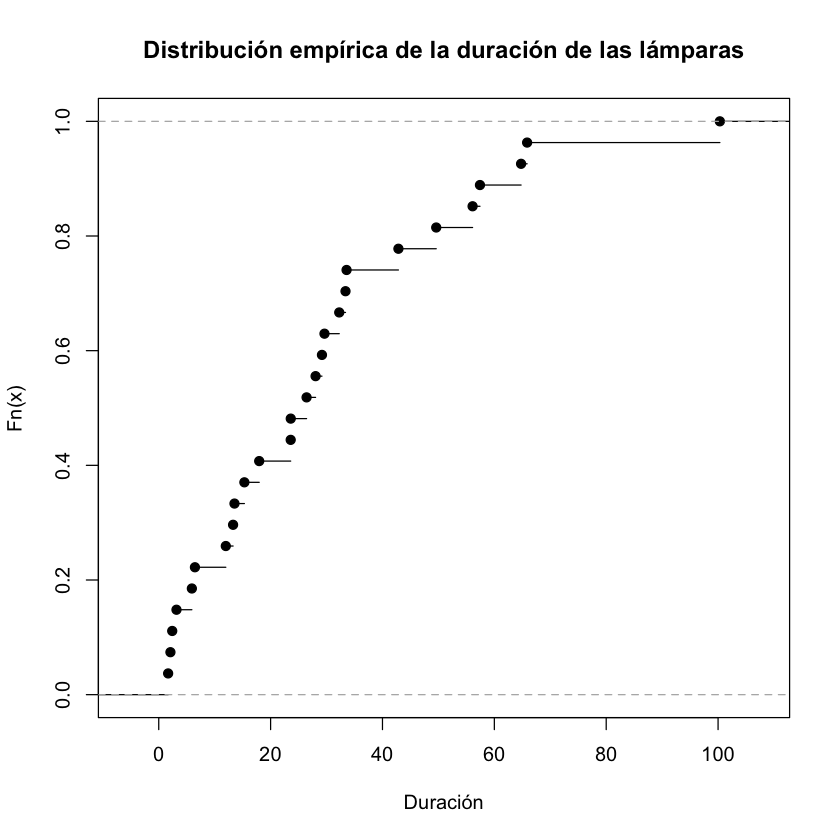

In [425]:
plot(ecdf(vlamparas), main='Distribución empírica de la duración de las lámparas', xlab='Duración')

### Ejercicio C

Completar: Estos datos permiten estimar que el 90% de las lámparas producidas por esta fábrica dura más de **2.866** horas y el 10% dura menos de **2.866** horas.

In [470]:
quantile(vlamparas, 0.1)

10% 
2.866

## Ejercicio 3

El archivo graduados.txt, contiene los promedios obtenidos en su carrera de grado de 30 inscriptos en el programa de postgrado del Departamento de Ingeniería Industrial e Investigación Operativa de la Universidad de Berkeley, California.

In [487]:
graduados = read.table('./datasets/p6/graduados.txt')
vgraduados = as.vector(t(graduados))
ngraduados = nrow(graduados)

### Pregunta A

Calcular la media muestral y la mediana muestral.

In [488]:
mean(vgraduados)

[1] 3.720667

In [489]:
median(vgraduados)

[1] 3.72

### Pregunta B

Calcular el desvío estándar muestral y la distancia intercuartil.

In [490]:
sd(vgraduados)

[1] 0.1456717

In [491]:
IQR(vgraduados)

[1] 0.2

### Pregunta C

Realice un histograma con los datos y superponga la curva de una densidad normal con los parámetros que considere pertinentes.

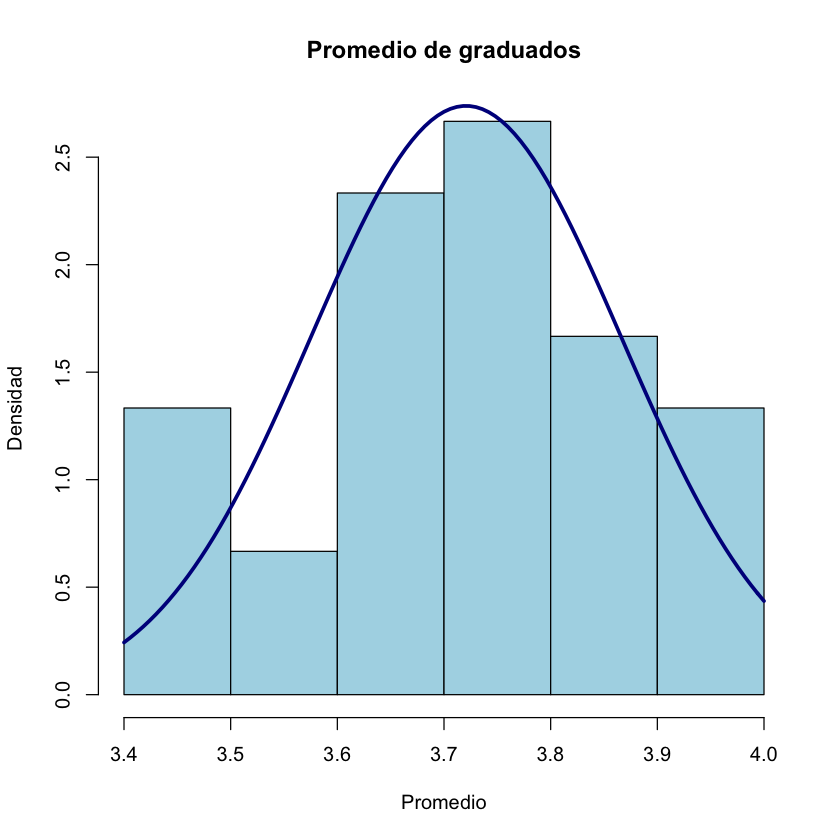

In [521]:
hist(vgraduados, prob=TRUE, col='lightblue', main='Promedio de graduados', xlab='Promedio', ylab='Densidad')

m = mean(vgraduados)
sd = sd(vgraduados)
curve(dnorm(x, mean=m, sd=sd), col='darkblue', lwd=3, add=TRUE)

### Pregunta D

Realice un boxplot con este conjunto de datos.

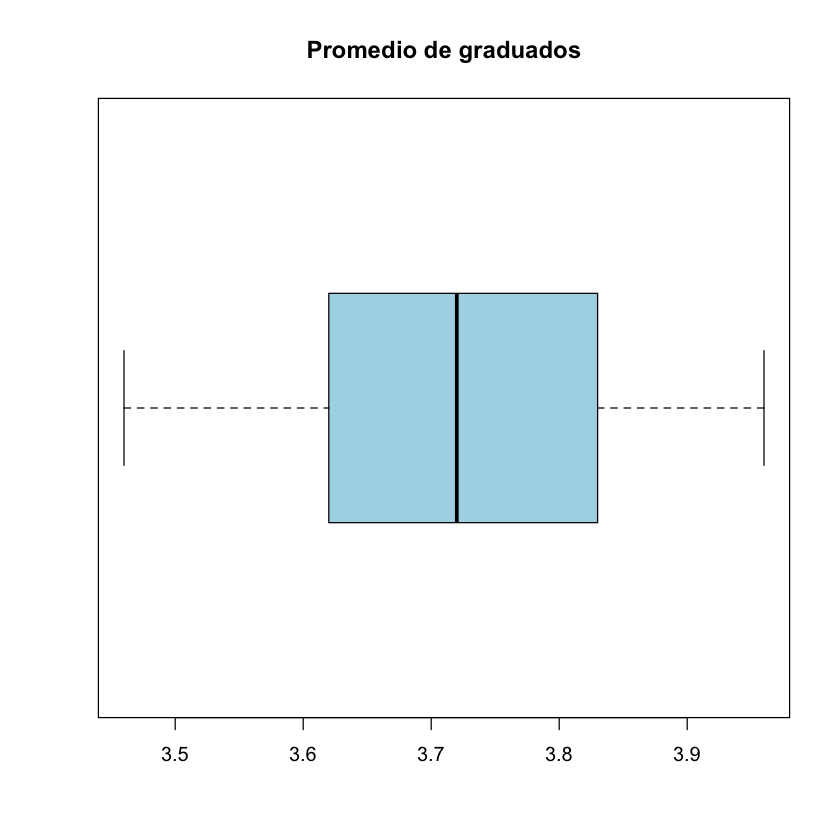

In [502]:
boxplot(vgraduados, horizontal=TRUE, col='lightblue', main='Promedio de graduados')

**¿Cuáles son sus características más sobresalientes?**

La muestra es bastante simétrica pues la línea dentro del rectángulo se encuentra casi en la mitad del mismo.

**¿Cómo relaciona lo observado en los gráficos con los valores estimados de media y mediana obtenidos en a)?**

Tiene sentido. El histograma muestra mayor densidad alrededor de la media, y de forma similar, el boxplot también está bastante centrado en la media.

**¿Hay outliers?**

No, porque no aparece ningún puntito suelto en el boxplot (si no se entiende, agregar un outlier a la muestra y volver a graficar, o jugar con el parámetro `range` del boxplot para achicar los bigotes).

### Pregunta E

¿Qué distribución cree que tienen estos datos?

Una distribución normal con $\mu = 3.72$ y $\sigma = 0.145$

### Pregunta F

Superponga en el histograma la curva de una densidad apropiada con los parámetros que considere pertinentes. Explore el comando `density` en R.

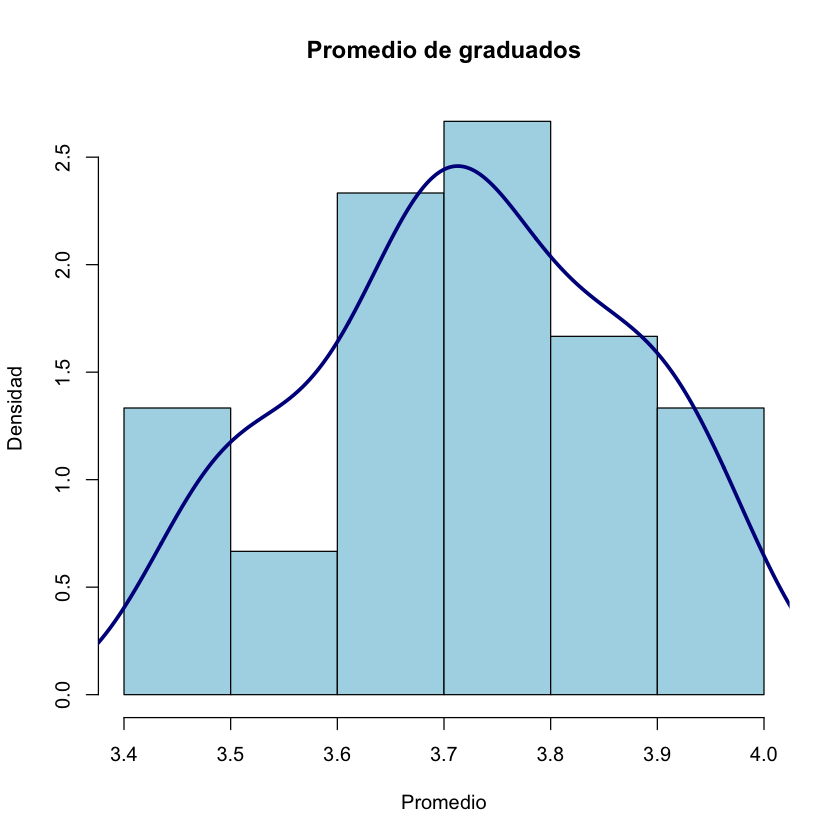

In [522]:
hist(vgraduados, prob=TRUE, col='lightblue', main='Promedio de graduados', xlab='Promedio', ylab='Densidad')
lines(density(vgraduados), col='darkblue', lwd=3)

### Pregunta G

¿Qué otro gráfico conoce que le permitiría verificar si su conjetura es razonable?

Me parece suficiente con todos los gráficos que ya dibujamos.

## Ejercicio 4

La siguiente tabla contiene valores de población, en cientos de miles, de las 10 ciudades más pobladas de 4 países en el año 1967. Estos datos se encuentran en el archivo ciudades.txt.

In [631]:
ciudades = read.table('./datasets/p6/ciudades.txt', header=TRUE)
nciudades = nrow(ciudades)

In [632]:
ciudades

Argentina,EEUU,Holanda,Japon
<dbl>,<dbl>,<dbl>,<dbl>
29.66,77.81,8.68,110.21
7.61,35.50,7.31,32.14
6.35,24.79,6.02,18.88
4.10,20.02,2.64,16.38
3.80,16.70,1.75,13.37
2.75,9.39,1.72,11.92
2.70,9.38,1.51,10.71
2.69,8.76,1.42,7.80
2.51,7.63,1.31,7.70


### Pregunta A

Construir en paralelo, para facilitar la comparación, un boxplot para los datos de cada país e identificar los puntos extremos en cada uno de ellos.

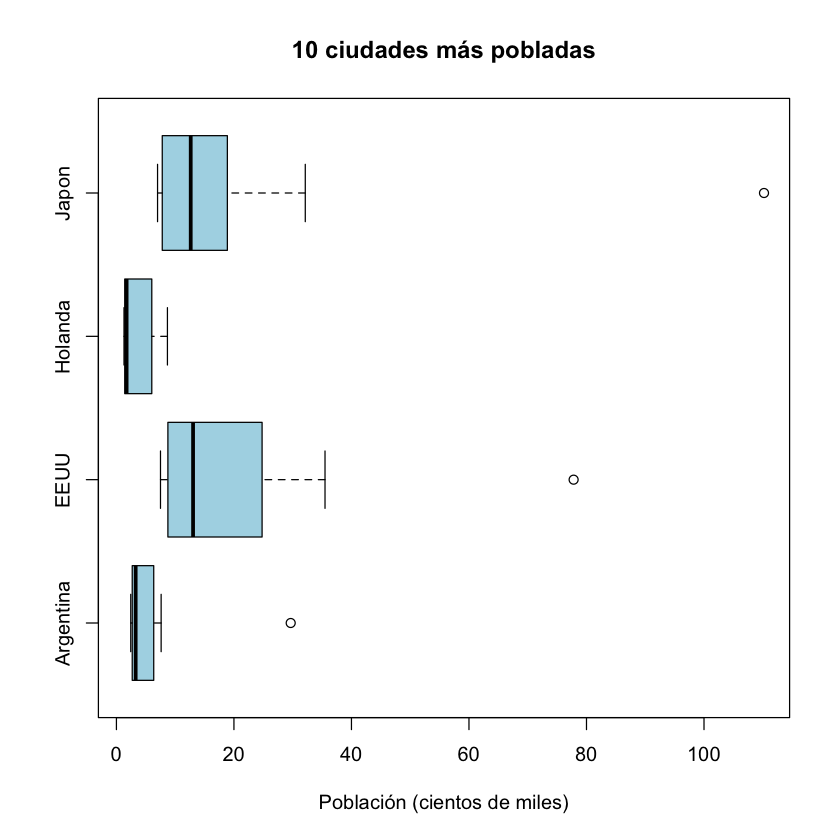

In [633]:
boxplot(ciudades, horizontal=TRUE, col='lightblue', main='10 ciudades más pobladas', xlab='Población (cientos de miles)')

In [634]:
summary(ciudades)

   Argentina           EEUU           Holanda          Japon        
 Min.   : 2.440   Min.   : 7.500   Min.   :1.290   Min.   :  7.000  
 1st Qu.: 2.692   1st Qu.: 8.915   1st Qu.:1.442   1st Qu.:  8.527  
 Median : 3.275   Median :13.045   Median :1.735   Median : 12.645  
 Mean   : 6.461   Mean   :21.748   Mean   :3.365   Mean   : 23.611  
 3rd Qu.: 5.787   3rd Qu.:23.598   3rd Qu.:5.175   3rd Qu.: 18.255  
 Max.   :29.660   Max.   :77.810   Max.   :8.680   Max.   :110.210  

### Pregunta B

Comparar los centros de cada población, sus dispersiones y su simetría. ¿Cuál es el país más homogéneamente habitado?

In [635]:
# Desvío estándar por cada ciudad
sort(apply(ciudades, 2, sd))

Holanda Argentina      EEUU     Japon 
 2.837328  8.340645 21.721691 31.329551

El país más homogéneamente habitado sería **Holanda**, pues:

- No hay ningún outlier.
- Tiene el menor desvío standard.

## Ejercicio 5

El archivo ingresos.txt contiene el ingreso mensual de un conjunto de 1000 trabajadores registrados de una ciudad, en miles de pesos.

In [597]:
ingresos = read.table('./datasets/p6/ingresos.txt')
vingresos = as.vector(t(ingresos))
ningresos = nrow(ingresos)

In [599]:
summary(ingresos)

       V1         
 Min.   :  15.00  
 1st Qu.:  15.00  
 Median :  18.47  
 Mean   :  87.18  
 3rd Qu.:  89.97  
 Max.   :1431.12  

### Pregunta A

¿Cuál es el ingreso mínimo percibido por los trabajadores encuestados? Estime la proporción de los trabajadores de la ciudad que percibe el ingreso mínimo.

In [611]:
min(vingresos)

[1] 15

In [612]:
sum(vingresos == min(vingresos)) / ningresos

[1] 0.461

### Pregunta B

Estimar el ingreso mensual que se necesita para pertenecer al 10% de trabajadores de la ciudad con ingresos más altos.

In [613]:
quantile(vingresos, 0.9)

90% 
240.5408

### Pregunta C

Calcular la media muestral, la mediana muestral y la media $\alpha$-podada con $\alpha$ = 0.1 (10%).

In [615]:
mean(vingresos)

[1] 87.17648

In [616]:
median(vingresos)

[1] 18.47371

In [621]:
mean(vingresos, trim=0.1)

[1] 49.93087

### Pregunta D

Calcular el desvío estándar muestral y la distancia intercuartil.

In [623]:
sd(vingresos)

[1] 152.0336

In [624]:
IQR(vingresos)

[1] 74.9733

### Pregunta E

Realizar un histograma y un boxplot. ¿Cuáles son las características más sobresalientes? ¿Hay outliers?

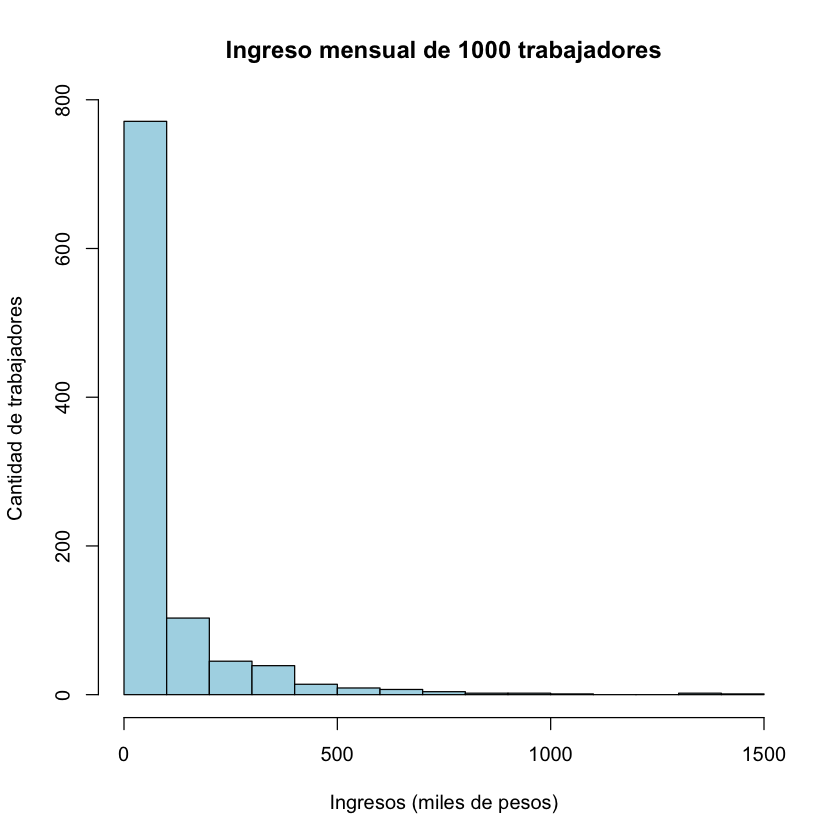

In [638]:
hist(vingresos, col='lightblue', main='Ingreso mensual de 1000 trabajadores', xlab='Ingresos (miles de pesos)', ylab='Cantidad de trabajadores')

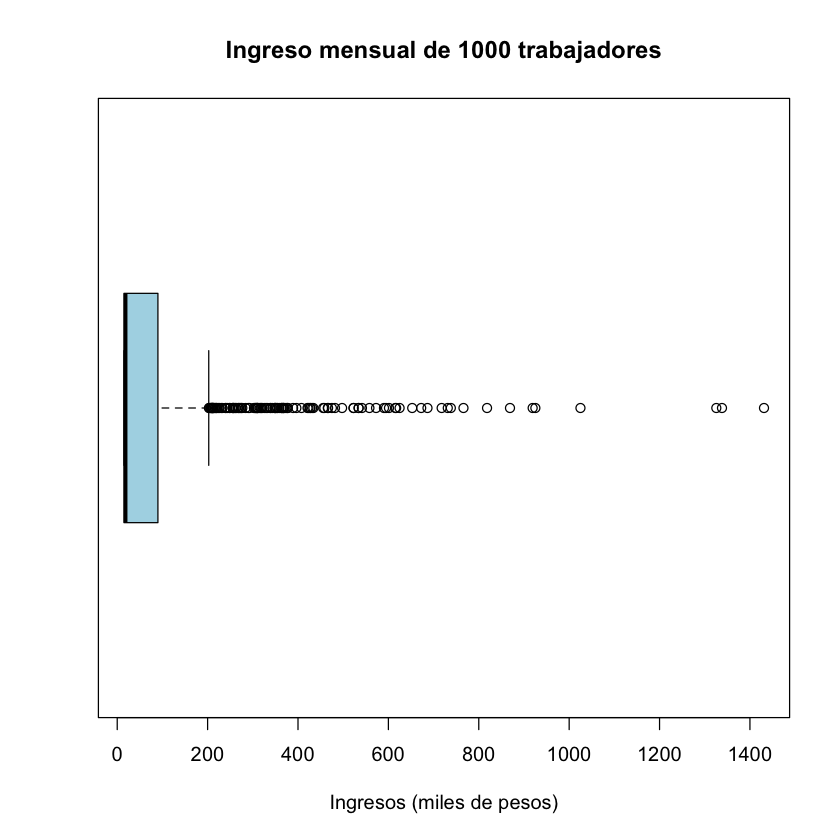

In [641]:
boxplot(vingresos, horizontal=TRUE, col='lightblue', main='Ingreso mensual de 1000 trabajadores', xlab='Ingresos (miles de pesos)')

Lo que se observa es que la gran mayoría de los trabajadores tiene ingresos bajos, y son muy pocos los que ganan muchísima plata.

### Pregunta F

¿Cree que los datos tienen distribución normal?

No.

### Pregunta G

Discutir con un compañero las ventajas y desventajas de cada medida de posición para describir el centro de los datos.